## Loading trained Word2

In [2]:
import gensim
model = gensim.models.Word2Vec.load("500features_20minwords_5context_1.1MReviews")

In [3]:
model.min_count

20

In [4]:
len(model.vocab)-1

35106

## Querying Word2Vec Results

In [5]:
model.most_similar("pleasing")

[(u'appealing', 0.6998410820960999),
 (u'tasteful', 0.6116796135902405),
 (u'stimulating', 0.6085736155509949),
 (u'sophisticated', 0.5932707190513611),
 (u'refined', 0.560735285282135),
 (u'intriguing', 0.5483849048614502),
 (u'inviting', 0.5443443059921265),
 (u'subdued', 0.542420506477356),
 (u'impressive', 0.541544497013092),
 (u'unappealing', 0.5393925309181213)]

In [12]:
model.most_similar("awesome")

[(u'amazing', 0.8100380301475525),
 (u'excellent', 0.6963405013084412),
 (u'outstanding', 0.68399977684021),
 (u'fantastic', 0.6803176999092102),
 (u'fabulous', 0.6687726974487305),
 (u'incredible', 0.6651450991630554),
 (u'great', 0.6244757175445557),
 (u'unbeatable', 0.6076033115386963),
 (u'phenomenal', 0.6069279313087463),
 (u'terrific', 0.5911704301834106)]

In [10]:
model.most_similar("pizza")

[(u'pepperoni', 0.5435189604759216),
 (u'pizzas', 0.5177438259124756),
 (u'crust', 0.5149180889129639),
 (u'margherita', 0.4947345554828644),
 (u'pie', 0.47431910037994385),
 (u'wings', 0.4478134512901306),
 (u'neapolitan', 0.44461575150489807),
 (u'pasta', 0.4445711374282837),
 (u'stromboli', 0.42378923296928406),
 (u'mozzarella', 0.41436484456062317)]

In [4]:
model.most_similar("beer")

[(u'beers', 0.7111819982528687),
 (u'draft', 0.6070507168769836),
 (u'wine', 0.6062905192375183),
 (u'drafts', 0.5826494693756104),
 (u'brews', 0.5793382525444031),
 (u'ipa', 0.578469455242157),
 (u'pint', 0.5771774649620056),
 (u'craft', 0.5672218203544617),
 (u'brew', 0.559675931930542),
 (u'tap', 0.5509968400001526)]

In [6]:
model.most_similar("great")

[(u'fantastic', 0.8443286418914795),
 (u'wonderful', 0.7955607175827026),
 (u'terrific', 0.7933611273765564),
 (u'fabulous', 0.7540406584739685),
 (u'good', 0.7312899231910706),
 (u'excellent', 0.7246370911598206),
 (u'awesome', 0.7195494174957275),
 (u'phenomenal', 0.7028565406799316),
 (u'superb', 0.6976917386054993),
 (u'amazing', 0.6795844435691833)]

In [7]:
model.most_similar(positive= ["food"] ,negative = ["service"])

[(u'cuisine', 0.43188926577568054),
 (u'foods', 0.4108291268348694),
 (u'cusine', 0.40695491433143616),
 (u'cuisines', 0.3344745635986328),
 (u'delicacies', 0.32621604204177856),
 (u'traditionally', 0.32172688841819763),
 (u'delicacy', 0.30805501341819763),
 (u'dishes', 0.3066617548465729),
 (u'delights', 0.30346646904945374),
 (u'fare', 0.2872616946697235)]

In [18]:
model.most_similar("very")

[(u'extremely', 0.7696152925491333),
 (u'super', 0.6704330444335938),
 (u'incredibly', 0.6338322758674622),
 (u'quite', 0.5965129137039185),
 (u'fairly', 0.5748721361160278),
 (u'pretty', 0.5605811476707458),
 (u'sooo', 0.5462443232536316),
 (u'exceptionally', 0.5125430226325989),
 (u'amazingly', 0.4971260130405426),
 (u'sooooo', 0.46890562772750854)]

In [19]:
model.most_similar("lol")

[(u'fuck', 0.4873337149620056),
 (u'anyway', 0.47939881682395935),
 (u'mad', 0.4696158766746521),
 (u'yea', 0.4663986265659332),
 (u'kinda', 0.4610860347747803),
 (u'drunk', 0.41878291964530945),
 (u'sorry', 0.4133502244949341),
 (u'yeah', 0.41302165389060974),
 (u'kidding', 0.41151171922683716),
 (u'anyways', 0.40970224142074585)]

In [8]:
model.most_similar('restaurant')

[(u'resturant', 0.7518532872200012),
 (u'establishment', 0.7483794093132019),
 (u'place', 0.7168595194816589),
 (u'eatery', 0.683251142501831),
 (u'joint', 0.681903064250946),
 (u'resto', 0.6742333769798279),
 (u'restaraunt', 0.6698898673057556),
 (u'restraunt', 0.6442806720733643),
 (u'restuarant', 0.6432080864906311),
 (u'steakhouse', 0.6061412692070007)]

## Word2Vec Visualization Using PCA

In [11]:
import numpy as np

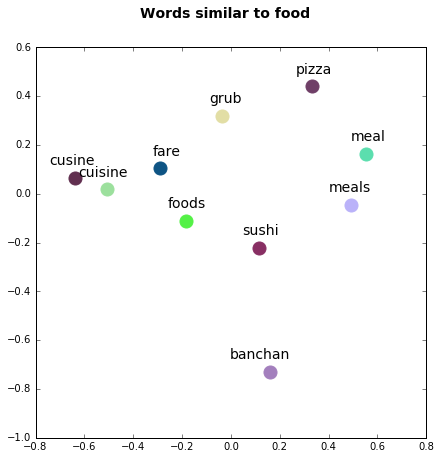

In [12]:
from matplotlib import pylab

from sklearn.decomposition import PCA
import numpy as np
def plot(words,sm):
  %matplotlib inline
  embeddings = [model[w] for w in words]
  
  pca = PCA(n_components=2)  
  two_d_embeddings = pca.fit_transform(embeddings)
   
  pylab.figure(figsize=(7,7))  # in inches
   
  for i, label in enumerate(words):
    x, y = two_d_embeddings[i,:]
    pylab.scatter(x, y,s=170, color=np.random.rand(3))
    pylab.suptitle('Words similar to '+sm, fontsize=14, fontweight='bold')
    pylab.annotate(label, xy=(x, y), xytext=(20,10), textcoords='offset points', ha='right', va='bottom',fontsize = 14)
  pylab.show()

plot([w[0] for w in model.most_similar('food')],"food")


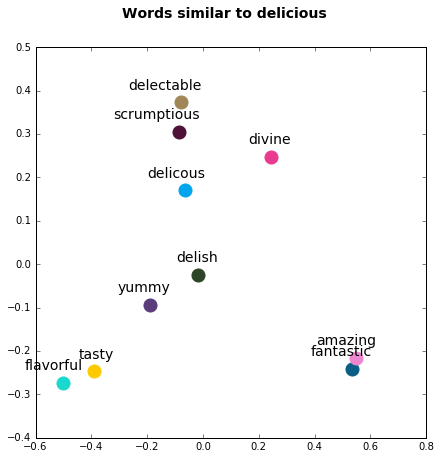

In [13]:
plot([w[0] for w in model.most_similar(['delicious'])],"delicious")

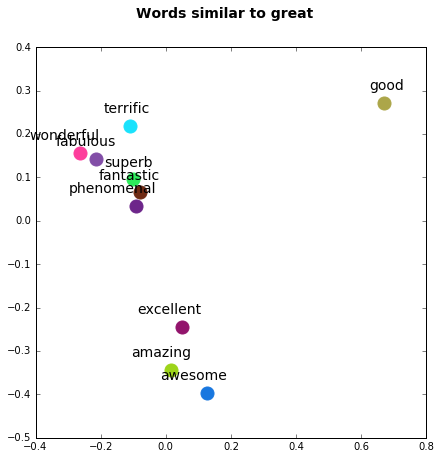

In [30]:
plot([w[0] for w in model.most_similar('great')],"great")


In [99]:
model.most_similar("ambiance")


[(u'atmosphere', 0.8843246102333069),
 (u'ambience', 0.88351970911026),
 (u'decor', 0.8292551040649414),
 (u'environment', 0.7528558373451233),
 (u'vibe', 0.7373777627944946),
 (u'cozy', 0.6912780404090881),
 (u'intimate', 0.686738908290863),
 (u'layout', 0.6818156838417053),
 (u'interior', 0.6805610656738281),
 (u'elegant', 0.6770901083946228)]